In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean.cm as cm
import datetime as dt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
import pickle 
import os
from salishsea_tools import viz_tools, geo_tools
import arrow
import copy
import math
import matplotlib.dates as mdates

In [2]:
mycmap = copy.copy(cm.oxy)
mycmap.set_bad('darkgreen')

In [3]:

lonSI1 = -123.58
lonSI2 = -123.44
latSI1 = 48.5
latSI2 = 48.695

In [4]:
# sep-nov 2018 SalishSeaCast config 
df_chemold = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/daily/SalishSea_1d_20180901_20181130_chem_T.nc') # 

#sep-nov 2018 SalishSea_oxy config
df_chemnewox = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/with_dia/SalishSea_1d_20180901_20181130_chem_T.nc')
df_diagnew = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/with_dia/SalishSea_1d_20180901_20181130_diag_T.nc')

# 1-10 sep 2018 SalishSea_oxy config
#df_chemnewox = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/01_10sep18/SalishSea_1d_20180901_20180910_chem_T.nc')
#df_diagnew = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/01_10sep18/SalishSea_1d_20180901_20180910_diag_T.nc')

df_chemoldb = xr.open_dataset('/data/atall/MEOPAR/SalishSeaCast/results/daily/SalishSea_1d_201801_chem_T.nc')
df_chemnewoxb = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/SalishSea_1d_20180101_20181231_chem_T.nc')
df_diagnewb = xr.open_dataset('/ocean/atall/MOAD/Model/runs/salishsea_oxy/2018/jan_dec18/SalishSea_1d_20180101_20181231_diag_T.nc')

In [17]:
# Constant and data rang
kk, jj, ii = 27, 353, 209 # Patricia bay 
syear = 2018
eyear = 2018
smonth = 9
emonth = 11
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 15)
print (startdate, enddate, jj, ii)

smonth2 = 1
emonth2 = 1
startdate2 = arrow.get(syear, smonth2, 1)
enddate2 = arrow.get(eyear, emonth2, 31)

2018-09-01T00:00:00+00:00 2018-11-15T00:00:00+00:00 353 209


# Oxygen diff between SalishSeaCast and SalishSea_oxy (new config)

In [8]:
o2diff = df_chemnewox.dissolved_oxygen[:,:kk,jj,ii] - df_chemold.dissolved_oxygen[:,:kk,jj,ii]

Text(0.5, 1.0, 'SalishSea_oxy - SalishSeaCast')

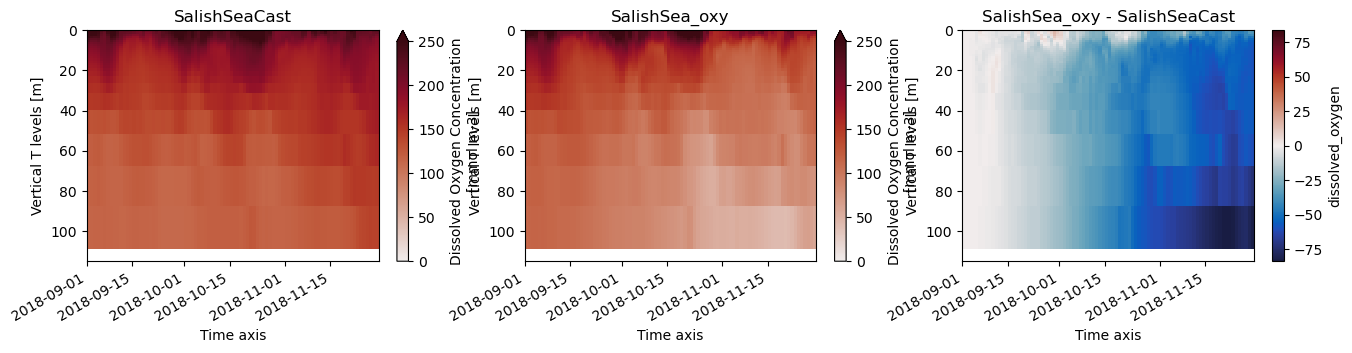

In [9]:
fig, ax = plt.subplots(1, 3, figsize = (16, 3)) 
df_chemold.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, ylim=(115, 0), xlim=(startdate, enddate));
df_chemnewox.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, ylim=(115, 0), xlim=(startdate, enddate));
o2diff.plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('SalishSeaCast')
ax[1].set_title('SalishSea_oxy')
ax[2].set_title('SalishSea_oxy - SalishSeaCast')

# Oxygen budget in the new Config

In [10]:
df_diagnew

<xarray.Dataset>
Dimensions:                (y_grid_T: 898, x_grid_T: 398, nvertex_grid_T: 4,
                            deptht: 40, axis_nbounds: 2, y_grid_W: 898,
                            x_grid_W: 398, nvertex_grid_W: 4, depthw: 40,
                            time_counter: 75)
Coordinates:
    nav_lat_grid_T         (y_grid_T, x_grid_T) float32 ...
    nav_lon_grid_T         (y_grid_T, x_grid_T) float32 ...
  * deptht                 (deptht) float32 0.5 1.5 2.5 ... 387.6 414.5 441.5
    nav_lat_grid_W         (y_grid_W, x_grid_W) float32 ...
    nav_lon_grid_W         (y_grid_W, x_grid_W) float32 ...
  * depthw                 (depthw) float32 0.0 1.0 2.0 ... 374.1 401.1 428.0
    time_centered          (time_counter) datetime64[ns] ...
  * time_counter           (time_counter) datetime64[ns] 2018-09-01T12:00:00 ...
Dimensions without coordinates: y_grid_T, x_grid_T, nvertex_grid_T,
                                axis_nbounds, y_grid_W, x_grid_W, nvertex_grid_W
Data variables: (12/22)
    bounds_nav_lon_grid_T  (y_grid_T, x_grid_T, nvertex_grid_T) float32 ...
    bounds_nav_lat_grid_T  (y_grid_T, x_grid_T, nvertex_grid_T) float32 ...
    area_grid_T            (y_grid_T, x_grid_T) float32 ...
    deptht_bounds          (deptht, axis_nbounds) float32 ...
    bounds_nav_lon_grid_W  (y_grid_W, x_grid_W, nvertex_grid_W) float32 ...
    bounds_nav_lat_grid_W  (y_grid_W, x_grid_W, nvertex_grid_W) float32 ...
    ...                     ...
    NPP                    (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    RPP                    (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    NITR                   (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    RMIN                   (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    RMIC                   (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
    RMES                   (time_counter, deptht, y_grid_T, x_grid_T) float32 ...
Attributes:
    name:         SalishSea_1d_20180901_20181130_diag_T
    description:  diagnostic terms of DO
    title:        diagnostic terms of DO
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-11 11:39:14 GMT
    uuid:         90f3100a-e0a0-44ce-b4c4-cdc569b24c4f

In [11]:
sinks_o2 = (df_diagnew.NITR + df_diagnew.RMIN + df_diagnew.RMIC + df_diagnew.RMES) #* 86400
#sinks_o2 = (df_diagnew2.RMIN + df_diagnew2.RMIC + df_diagnew2.RMES) #* 86400
sourc_o2 = (df_diagnew.NPP + df_diagnew.RPP) #* 86400
sms_o2 = sinks_o2 + sourc_o2

Text(0.5, 1.0, 'Resp/Z1')

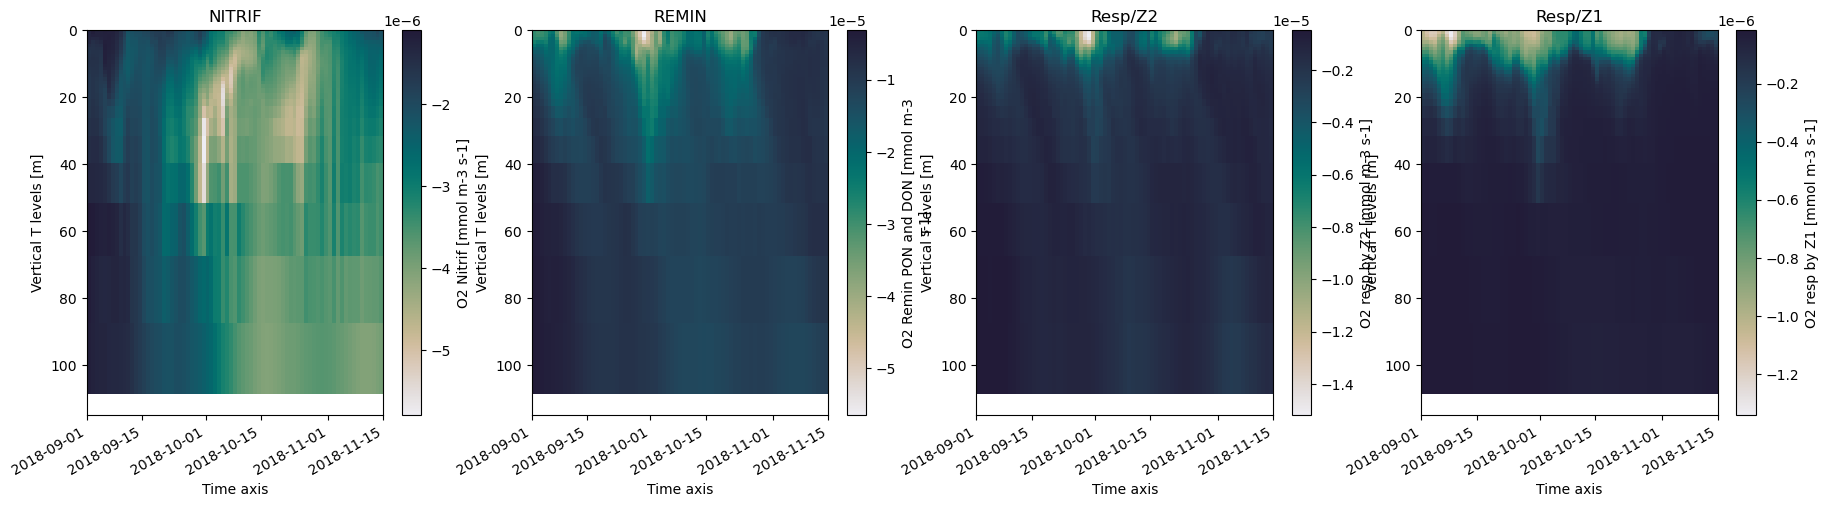

In [18]:
print('Sinks Biological Terms')
fig, ax = plt.subplots(1, 4, figsize = (22, 5)) 
df_diagnew.NITR[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.rain, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.RMIN[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.rain, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.RMES[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.rain, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.RMIC[:,:kk,jj,ii].plot(ax=ax[3], y="deptht", yincrease=False, cmap=cm.rain, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('NITRIF')
ax[1].set_title('REMIN')
ax[2].set_title('Resp/Z2')
ax[3].set_title('Resp/Z1')



Text(0.5, 1.0, 'RegPP')

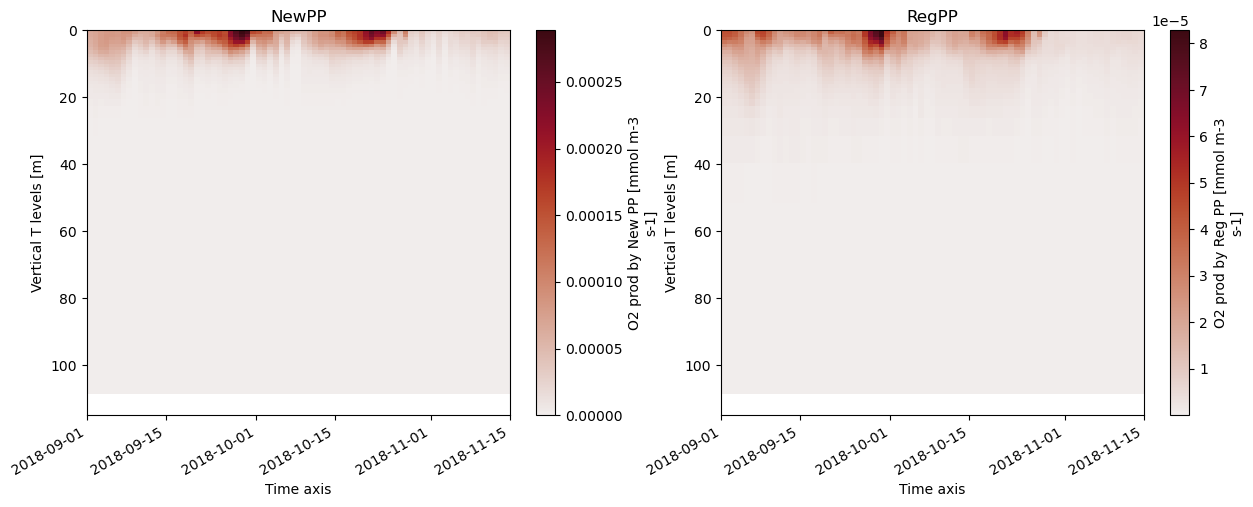

In [19]:
print('Sources Biological Terms')
fig, ax = plt.subplots(1, 2, figsize = (15, 5)) 
df_diagnew.NPP[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.RPP[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('NewPP')
ax[1].set_title('RegPP')

Text(0.5, 1.0, 'SMS')

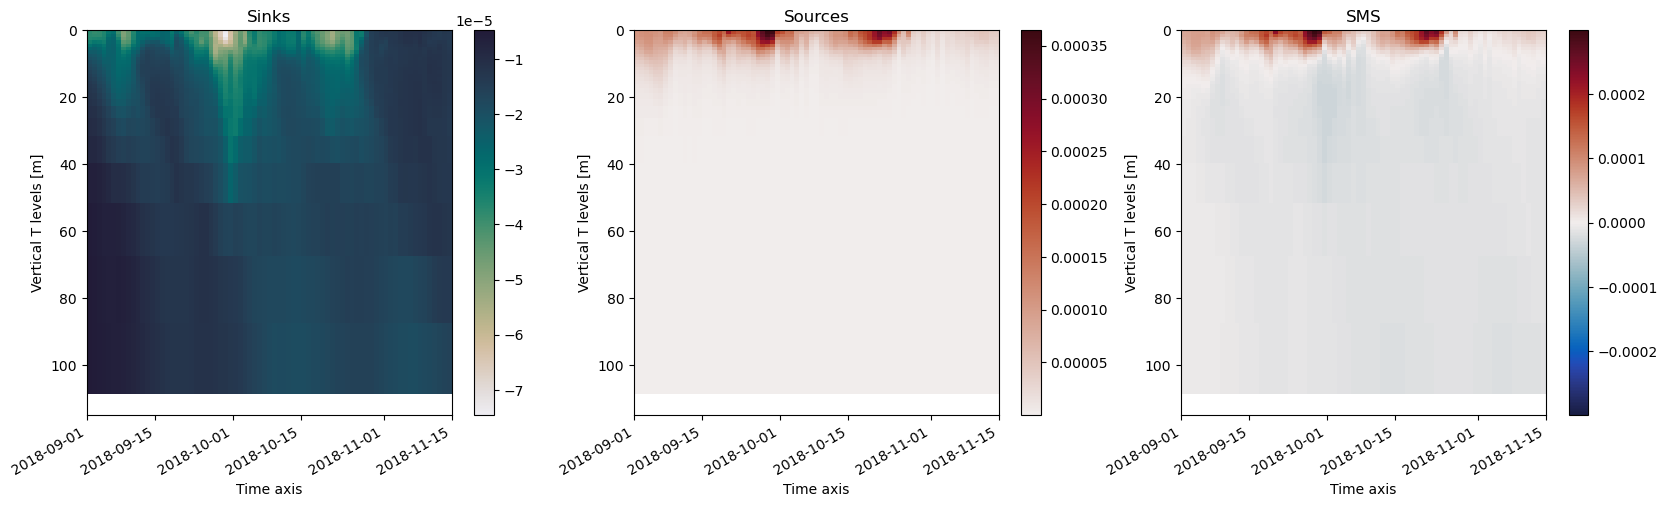

In [20]:
print('Sources Minus Sinks')
fig, ax = plt.subplots(1, 3, figsize = (20, 5)) 
sinks_o2[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.rain, ylim=(115, 0), xlim=(startdate, enddate));
sourc_o2[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.amp, ylim=(115, 0), xlim=(startdate, enddate));
sms_o2[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('Sinks')
ax[1].set_title('Sources')
ax[2].set_title('SMS')

In [15]:
AVDH = df_diagnew.XADV + df_diagnew.YADV
AVDT = AVDH + df_diagnew.ZADV
VMIXt = df_diagnew.VMIX - df_diagnew.VMIXH


Text(0, 0.5, '')

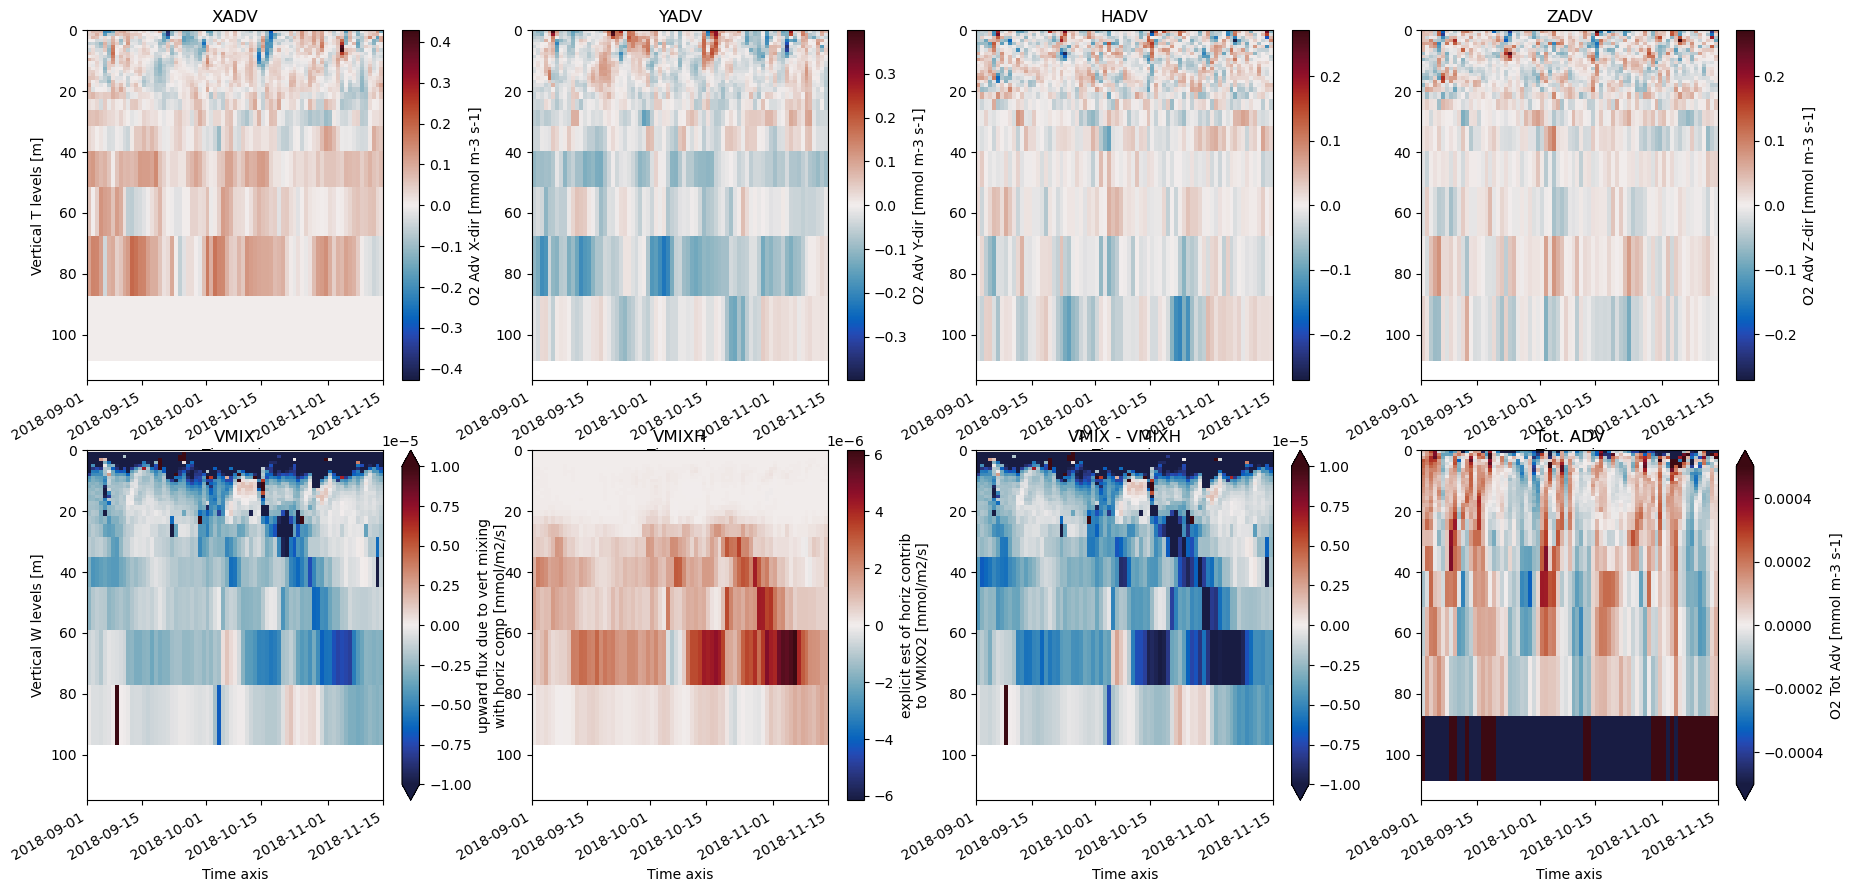

In [21]:
print('Physical Terms')
fig, ax = plt.subplots(2, 4, figsize = (22, 10)) 
df_diagnew.XADV[:,:kk,jj,ii].plot(ax=ax[0,0], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.YADV[:,:kk,jj,ii].plot(ax=ax[0,1], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
AVDH[:,:kk,jj,ii].plot(ax=ax[0,2], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.ZADV[:,:kk,jj,ii].plot(ax=ax[0,3], y="deptht", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));

df_diagnew.VMIX[:,:kk,jj,ii].plot(ax=ax[1,0], y="depthw", yincrease=False, cmap=cm.balance, vmin=-0.00001, vmax=0.00001, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.VMIXH[:,:kk,jj,ii].plot(ax=ax[1,1], y="depthw", yincrease=False, cmap=cm.balance, ylim=(115, 0), xlim=(startdate, enddate));
VMIXt[:,:kk,jj,ii].plot(ax=ax[1,2], y="depthw", yincrease=False, cmap=cm.balance, vmin=-0.00001, vmax=0.00001, ylim=(115, 0), xlim=(startdate, enddate));
df_diagnew.TADV[:,:kk,jj,ii].plot(ax=ax[1,3], y="deptht", yincrease=False, cmap=cm.balance, vmin=-0.0005, vmax=0.0005, ylim=(115, 0), xlim=(startdate, enddate));

ax[0,0].set_title('XADV')
ax[0,1].set_title('YADV')
ax[0,2].set_title('HADV')
ax[0,3].set_title('ZADV')

ax[1,0].set_title('VMIX')
ax[1,1].set_title('VMIXH')
ax[1,2].set_title('VMIX - VMIXH')
ax[1,3].set_title('Tot. ADV')

ax[0,1].set_ylabel('')
ax[0,2].set_ylabel('')
ax[0,3].set_ylabel('')
ax[1,1].set_ylabel('')
ax[1,2].set_ylabel('')
ax[1,3].set_ylabel('')

# Resume - Oxygen Budget

In [24]:
ADVd = df_diagnew.TADV * 86400
SMSd = sms_o2 * 86400
VMIXd = df_diagnew.VMIX * 86400

Text(0.5, 1.0, 'Vert. Mixing (mmol/m2/day)')

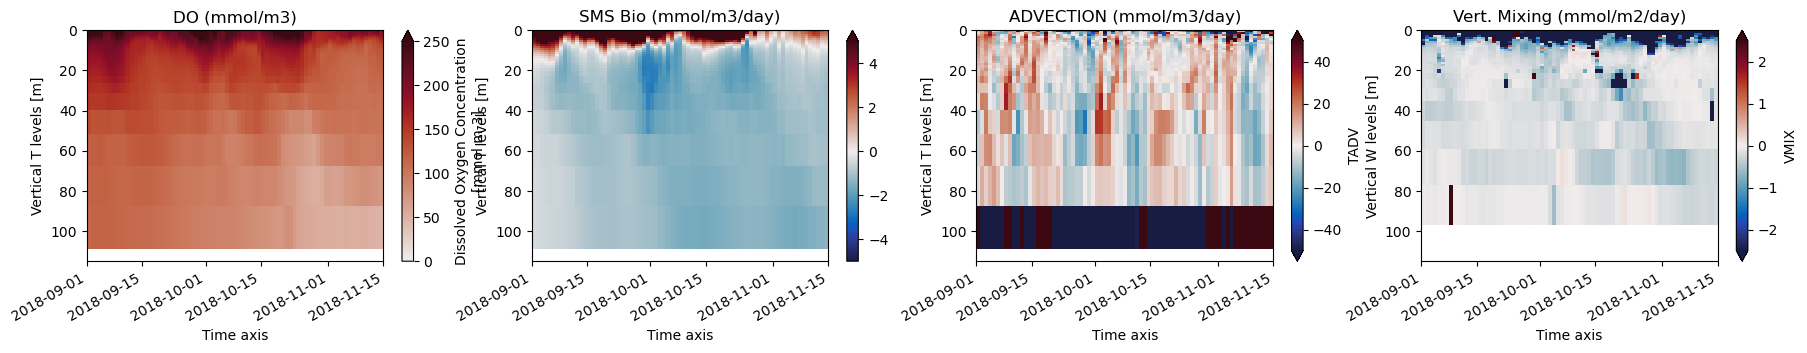

In [32]:
fig, ax = plt.subplots(1, 4, figsize = (22, 3)) 
df_chemnewox.dissolved_oxygen[:,:kk,jj,ii].plot(ax=ax[0], y="deptht", yincrease=False, cmap=cm.amp, vmin=0, vmax=250, ylim=(115, 0), xlim=(startdate, enddate));
SMSd[:,:kk,jj,ii].plot(ax=ax[1], y="deptht", yincrease=False, cmap=cm.balance, vmin=-5, vmax=5, ylim=(115, 0), xlim=(startdate, enddate));
ADVd[:,:kk,jj,ii].plot(ax=ax[2], y="deptht", yincrease=False, cmap=cm.balance, vmin=-50, vmax=50, ylim=(115, 0), xlim=(startdate, enddate));
VMIXd[:,:kk,jj,ii].plot(ax=ax[3], y="depthw", yincrease=False, cmap=cm.balance, vmin=-2.5, vmax=2.5, ylim=(115, 0), xlim=(startdate, enddate));

ax[0].set_title('DO (mmol/m3)')
ax[1].set_title('SMS Bio (mmol/m3/day)')
ax[2].set_title('ADVECTION (mmol/m3/day)')
ax[3].set_title('Vert. Mixing (mmol/m2/day)')